<a href="https://colab.research.google.com/github/Gehlen05/modelos-deteccao-fraude/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ast import increment_lineno
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/creditcard_normalizado.csv')
df.head()

Mounted at /content/drive


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
drive.mount("/content/drive", force_remount=True)
arquivo_rede_neural = open('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/modelos_salvos/modelo_rede_neural_30_30_dropout_treinamento_10.pkl', 'rb')
arquivo_autoencoder = open('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/modelos_salvos/modelo_autoencoder_legitimo_fraude_treinamento_30_versao_semente_42.pkl', 'rb')
arquivo_randon_forest = open('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/modelos_salvos/modelo_randon_forest_deep_7.pkl', 'rb')
arquivo_naive_bayes = open('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/modelos_salvos/modelo_naive_bayes.pkl', 'rb')

# dump information to that file
rede_neural = pickle.load(arquivo_rede_neural)
autoencoder = pickle.load(arquivo_autoencoder)
randon_forest = pickle.load(arquivo_randon_forest)
naive_bayes = pickle.load(arquivo_naive_bayes)

Mounted at /content/drive


In [ ]:
y_pred_rede_neural = rede_neural.predict(x_test)
y_pred_rede_neural = (y_pred_rede_neural>0.5)
y_pred_autoencoder = autoencoder.predict(x_test)
y_pred_randon_forest = randon_forest.predict(x_test)
y_pred_naive_bayes = naive_bayes.predict(x_test)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
test_x_predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - test_x_predictions, 2), axis=1) # original
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
threshold = 4
pred_y = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]

In [ ]:
df_ensemble = pd.DataFrame(y_pred_rede_neural, columns=['y_pred_rede_neural'])


In [ ]:
df_ensemble['y_pred_rede_neural'] = df_ensemble['y_pred_rede_neural'].astype(int)

In [ ]:
df_ensemble['y_pred_autoencoder'] =  pred_y

In [ ]:

df_ensemble['y_pred_randon_forest'] = y_pred_randon_forest
df_ensemble['y_pred_naive_bayes'] = y_pred_naive_bayes

In [ ]:
soma_linhas = df_ensemble.sum(axis=1)
soma_linhas = np.where(soma_linhas >=3 , 1, 0)

In [ ]:
df_ensemble['resultado_ensemble'] =  soma_linhas

In [ ]:
df_ensemble.head()

,y_pred_rede_neural,y_pred_autoencoder,y_pred_randon_forest,y_pred_naive_bayes,resultado_ensemble
0,1,1,0,1,1
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


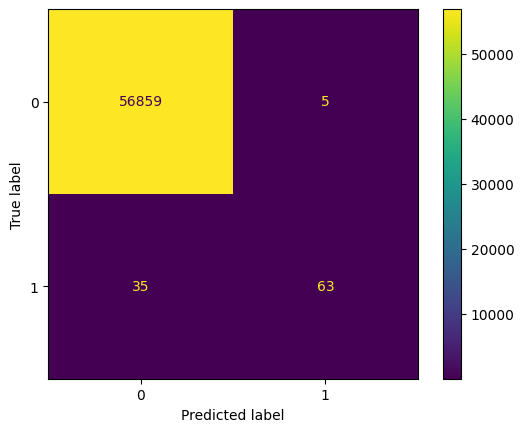

In [ ]:
cm = confusion_matrix(y_test, df_ensemble.resultado_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print('Acurácia: ', metrics.accuracy_score(y_test, df_ensemble.resultado_ensemble))
print('Precisão: ', metrics.precision_score(y_test, df_ensemble.resultado_ensemble))
print('Recall: ', metrics.recall_score(y_test, df_ensemble.resultado_ensemble))
print('F1: ', metrics.f1_score(y_test, df_ensemble.resultado_ensemble))

Acurácia:  0.9992977774656788
Precisão:  0.9264705882352942
Recall:  0.6428571428571429
F1:  0.7590361445783133
